# Beer Analysis

For this project, we were interested in various types of beer and beer characteristics, which may affect consumer sensory perceptions.

The research questions for our project are:

1. What are the tasting profiles and ratings of by beer style?
   
3. Which group of beers (e.g., beers high in bitter tasting profiles) have the highest review ratings?
  
5. Are there correlations between sensory ratings? E.g., appearance and taste; and aroma and taste.
	
To answer these questions, we searched public data repository sites and identified a beer profile and ratings dataset on Kaggle (Beer Profile and Ratings Data Set (kaggle.com)). We analyzed the data to answer our research questions and utilize what we have learned in our classes to visualize and explain our findings for presentation.

With the surge in popularity of craft beers, the diversity of macro and micro brewery offerings has increased. While increased options may be good for beer consumers, this presents a challenge to distributors and retailers as to what beers to carry when warehouse and shelf space, refrigerated cases and taps are limited.

The goal of our analysis is to provide insights that help inform such businesses as they decide what to stock and sell to their customers.


In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Path to the cleaned .csv file
path = "Outputs/cleanbeer.csv"

# Read file into a Pandas dataframe
beer_df = pd.read_csv(path)

# Preview file
beer_df.head()

,Beer Name (Full),Name,Brewery,Style_Main,Style_Sub,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Alaskan Brewing Co. Alaskan Amber,Amber,Alaskan Brewing Co.,Altbier,NaN,5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Long Trail Brewing Co. Double Bag,Double Bag,Long Trail Brewing Co.,Altbier,NaN,7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Brewing Co. Long Trail Ale,Long Trail Ale,Long Trail Brewing Co.,Altbier,NaN,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Doppelsticke,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Altbier,NaN,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Sleigh'r Dark Doüble Alt Ale,Ninkasi Brewing Company,Altbier,NaN,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [3]:
beer_df[['Beer Name (Full)', 'Style_Main', 'Astringency', 'Hoppy', 'Bitter']]

,Beer Name (Full),Style_Main,Astringency,Hoppy,Bitter
0,Alaskan Brewing Co. Alaskan Amber,Altbier,13,57,47
1,Long Trail Brewing Co. Double Bag,Altbier,12,35,33
2,Long Trail Brewing Co. Long Trail Ale,Altbier,14,54,42
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Altbier,13,40,47
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Altbier,25,51,44
...,...,...,...,...,...
3192,Cisco Brewers Inc. Winter Shredder,Winter Warmer,15,45,35
3193,RJ Rockers Brewing Company First Snow Ale,Winter Warmer,15,14,16
3194,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Winter Warmer,8,21,19
3195,Fish Brewing Company / Fishbowl Brewpub Fish T...,Winter Warmer,11,110,70


# Question 1: 

#### What are the tasting profiles (e.g., bitter or sweet) of the top-rated beers?

In [6]:
# Explanation of beer style definitions, per source: 2018 CraftBeer.com Beer Styles Guide published by the Brewers Association.


In [43]:
styles_top5 = beer_df.loc[(beer_df['Style_Main'] == 'Lager') |
                    (beer_df['Style_Main'] == 'IPA') |
                    (beer_df['Style_Main'] == 'Stout') | 
                    (beer_df['Style_Main'] == 'Strong Ale') |
                    (beer_df['Style_Main'] == 'Wheat Beer'),
                    ['Style_Main'] + ['review_overall']]

styles_top5

,Style_Main,review_overall
800,IPA,3.000000
801,IPA,4.172727
802,IPA,4.104485
803,IPA,4.168667
804,IPA,4.219412
...,...,...
3129,Wheat Beer,4.031847
3130,Wheat Beer,3.596774
3131,Wheat Beer,3.742754
3132,Wheat Beer,3.914062


In [27]:
#Group and describe top five beer styles by number of reviews
styles_top5 = beer_df.loc[(beer_df['Style_Main'] == 'Lager') |
                    (beer_df['Style_Main'] == 'IPA') |
                    (beer_df['Style_Main'] == 'Stout') | 
                    (beer_df['Style_Main'] == 'Strong Ale') |
                    (beer_df['Style_Main'] == 'Wheat Beer'),
                    ['Style_Main'] + ['review_overall']]

top5_describe = styles_top5.groupby(['Style_Main']).describe()
top5_describe

review_overall                                                    \
                    count      mean       std       min       25%       50%   
Style_Main                                                                    
IPA                 163.0  3.972965  0.287534  2.883621  3.821575  3.992000   
Lager               567.0  3.385110  0.569375  1.471154  2.990247  3.461538   
Stout               254.0  3.947546  0.302947  2.500000  3.792760  4.000000   
Strong Ale          148.0  3.864981  0.248349  3.083333  3.750000  3.882626   
Wheat Beer          206.0  3.778889  0.347209  2.379310  3.580492  3.799123   

                                
                 75%       max  
Style_Main                      
IPA         4.145589  4.625800  
Lager       3.816986  4.634615  
Stout       4.146083  4.591052  
Strong Ale  4.034694  4.342245  
Wheat Beer  4.000000  4.562112

The table of descriptive statistics above reveal several insights regarding the focus styles and their overall consumer ratings:

- Mean scores by style across the 0-5 rating scale were tighter than anticipated (from 3.38 to 3.97).
- The India Pale Ale ("IPA") style boasted the highest mean rating, followed closely by the Stout style. Their medians were nearly the same and only slightly higher than their respective means.
- The Lager style mean rating was lowest for the group as was its minimum value in the set (1.47). Lager had by far the most unique beer entries in the table at a count of 567.

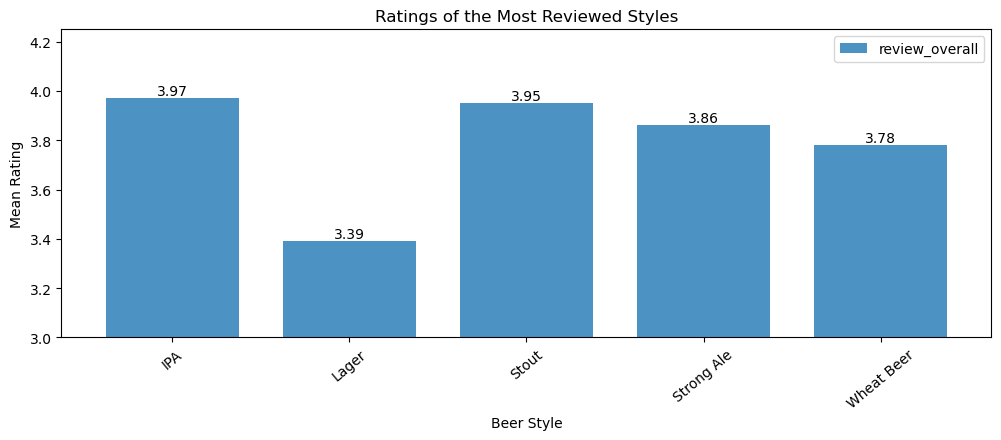

In [28]:
# find the mean overall rating for each style in the group
top5_mean = styles_top5.groupby(['Style_Main']).mean()

top5_mean = np.round(top5_mean, decimals=2)

# plot in bar chart
top5_mean_plot = top5_mean.plot(kind='bar', figsize=(12,4), alpha=0.8, rot=40, width=0.75)

plt.title("Ratings of the Most Reviewed Styles")
plt.xlabel("Beer Style")
plt.ylabel("Mean Rating")
plt.ylim(3, 4.25)

for container in top5_mean_plot.containers:
    top5_mean_plot.bar_label(container)

# save chart as .PNG file and display
# plt.tight_layout()
plt.savefig("Outputs/Images/mean_style_ratings.png")
plt.show()

Given the tight mean overall review ratings across these focus styles, the bar chart above is intended to aid in visualization.

*NOTE: ratings are based on a scale of 0 to 5, which is not reflected in the vertical axis (mean rating scale).

Beyond overall review ratings, we were interested in understanding the consumer ratings according to sensory perception:
- aroma
- appearance
- palate
- taste

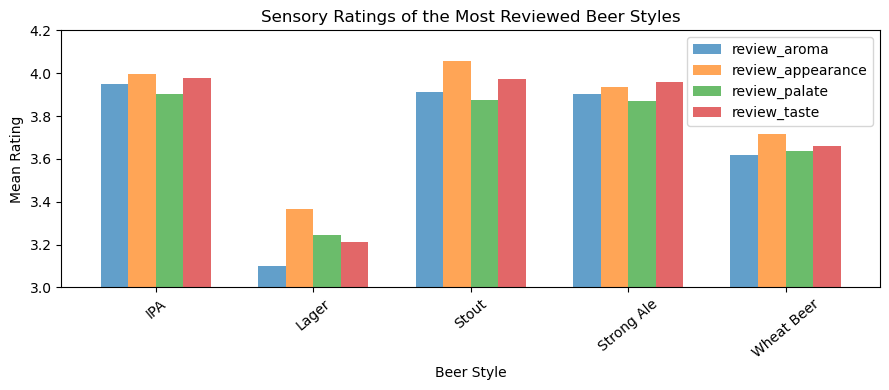

In [34]:
# create dataframe to group top 5 beer styles (per total # of reviews) by the types of reviews, in order to visualize
senses_top5 = beer_df.loc[(beer_df['Style_Main'] == 'Lager') |
                    (beer_df['Style_Main'] == 'IPA') |
                    (beer_df['Style_Main'] == 'Stout') | 
                    (beer_df['Style_Main'] == 'Strong Ale') |
                    (beer_df['Style_Main'] == 'Wheat Beer'),
                    ['Style_Main'] +
                    ['review_aroma'] +
                    ['review_appearance'] +
                    ['review_palate'] +
                    ['review_taste']]

senses_top5_mean = senses_top5.groupby(['Style_Main']).mean()

# plot in bar chart
senses_top5_mean_plot = senses_top5_mean.plot(kind='bar', figsize=(9,4), alpha=0.7, rot=40, width=0.7)

plt.title("Sensory Ratings of the Most Reviewed Beer Styles")
plt.xlabel("Beer Style")
plt.ylabel("Mean Rating")
plt.ylim(3, 4.2)

# save chart as .PNG file and display
plt.tight_layout()
plt.savefig("Outputs/Images/mean_sense_ratings.png")
plt.show()

Plotting mean ratings by sense for the focus styles, appearance and taste stand out as more highly rated for each style than aroma or palate, with the exception of Lager on which mean appearance was rated higher than

*NOTE: ratings are based on a scale of 0 to 5, which is not reflected in the vertical axis (mean rating scale).

# Question 2: 

## Which group of beers (e.g., beers high in bitter tasting profiles) have the highest review ratings?

In [ ]:
# answer/plot here



# save chart as .PNG file and display
# plt.savefig("Outputs/Images/_____.png")
# plt.show()

# Question 3: 

## Is there a correlation between the review of beer appearance (e.g., color) and review of taste?

In [35]:
appearance = beer_df.iloc[:,20]
taste = beer_df.iloc[:,22]
correlation = stats.pearsonr(appearance,taste)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.85


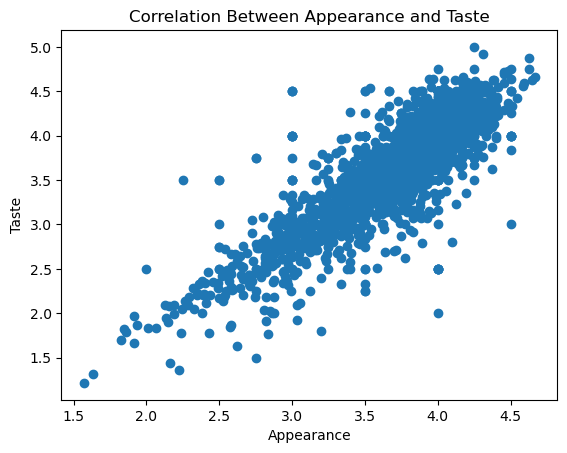

In [36]:
plt.scatter(appearance,taste)
plt.xlabel('Appearance')
plt.ylabel('Taste')
plt.title("Correlation Between Appearance and Taste")

# save chart as .PNG file and display
plt.savefig("Outputs/Images/appearance_taste.png")
plt.show()

**Discussion about the linear relationship:**
The correlation between appearance and taste is positive and strong (0.85). This shows that when appearance is rated positively, taste tends to be rated positively as well.

## Is there a correlation between the review of beer aroma and review of taste?

In [37]:
aroma = beer_df.iloc[:,19]
taste = beer_df.iloc[:,22]
correlation = stats.pearsonr(aroma,taste)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.94


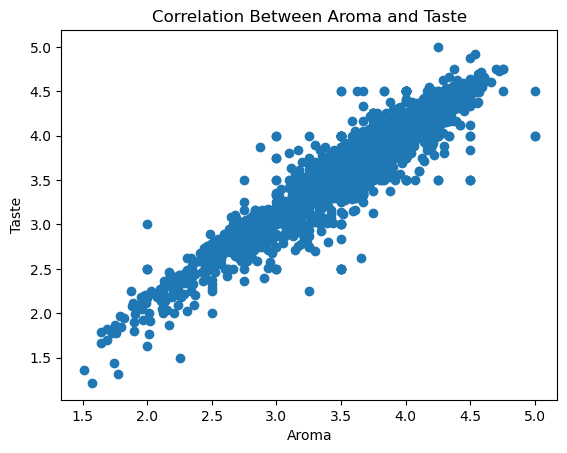

In [39]:
#plot scatter: aroma/taste
plt.scatter(aroma,taste)
plt.xlabel('Aroma')
plt.ylabel('Taste')
plt.title("Correlation Between Aroma and Taste")

# save chart as .PNG file and display
plt.savefig("Outputs/Images/aroma_taste.png")
plt.show()

**Discussion about the linear relationship:** The correlation between aroma and taste is also positive and strong (0.94). It can be assumed that when aroma is rated positively, taste can also be rated positively.

# Summary

The goal of this analysis is to provide insights that help inform beer distributors and retailers (e.g., pubs, restaurants, liquor stores) as they make decisions as to what beer to stock and sell to their customers.

- Among the most reviewed beer styles, IPAs and Stouts exhibited the highest mean ratings among the review categories.
- Lagers as a style owned the most reviews but among the main beer styles were the lowest rated.
- 


## Limitations:

Our research has some limitations. Firstly, the reviews and ratings seem to be done mostly by beer enthusiasts. Taking the time to share information on a social website and rating each beer after tasting shows the interest participants have for beer. Therefore, the data would not represent the general public's opinion of the beers. It is recommeded that generalizations should not be made. 

Second, there were ratings that were ambiguous as to what they were specifically measuring. For example, the review for beer appearance was difficult for us to decipher. Was this the color of the beer? The texture? On the website Discover Beer, they state beer appearance should be judged by color, clarity and carbonation [1]. It would have been clearer for the ratings to be done according to these specific items.

Thirdly, there may be other factors that influenced the consumers' ratings. For instance: the ambiance of the environment in which a person was drinking beer may have affected how they evaluated the drink; the lighting in the space could affect the perceived appearance of the beer; the company one is with (e.g., friends) may influence the overall ratings as could the influence of the alcohol in the beer itself. There are many factors that could have affected the ratings other than the objective appearance, aroma, and taste of the beer. 

[1] Source: https://discovering.beer/how-to-taste-beer/step-1-appearance/#:~:text=A%20beer%E2%80%99s%20appearance%20can%20help%20set%20some%20expectations,the%203%20C%E2%80%99s%3A%20colour%2C%20clarity%20and%20carbonation.%20Colour)